In [ ]:
# paste install script here

running luminescent python frontend
2025-05-08 21:12:34.055 | WARNING  | kfactory.kcell:show:3520 - Could not connect to klive server


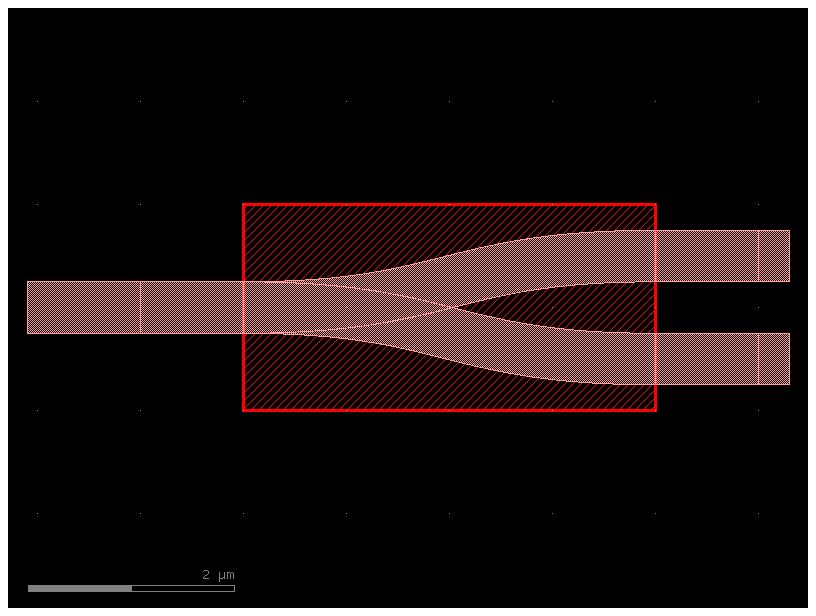

In [ ]:
"""
We inverse design a 1x2 splitter
"""

import os
import luminescent as lumi
from luminescent import DESIGN, WG, CLAD
import gdsfactory as gf
from gdsfactory.technology import LogicalLayer, LayerLevel, LayerStack

path = os.path.join("runs", "splitter")
length = 4.0
width = 2.0
width_wg = 0.5

# margins
source_port_margin = 1
port_margin = 0.3
xmargin_mode = 0.5

# makes gdsfactory component to be optimized. has rectangular design region with port stubs. ports numbered clockwise from bottom left. `io` specifies input output paths for initial geometry
c = gf.Component()

dut = c << lumi.mimo(
    length,
    width,
    west=1,
    east=2,
    width_wg=width_wg,
    io=[(1, 2), (1, 3)],
    layer=WG,
    design_layer=DESIGN,
)

# margin extensions
ext1 = c << gf.components.straight(1.1 * source_port_margin, width=width_wg)
ext2 = c << gf.components.straight(port_margin, width=width_wg)
ext3 = c << gf.components.straight(port_margin, width=width_wg)
ext1.connect("o2", dut.ports["o1"])
ext2.connect("o1", dut.ports["o2"])
ext3.connect("o1", dut.ports["o3"])

c.add_port("o1", port=dut.ports["o1"])
c.add_port("o2", port=dut.ports["o2"])
c.add_port("o3", port=dut.ports["o3"])

c << gf.components.bbox(component=c, layer=CLAD, top=1, bottom=1)

c.plot()
c.show()

# optimization targets wrt wavelengths
targets = [
    lumi.Target("o2@0,o1@0", 0.5, weight=1.0, wavelength=1.55),  # 50% power split
]

lumi.make_prob(
    path,  # path to make problem folder
    c,
    targets=targets,
    symmetries=["y"],
    #
    materials=lumi.MATERIALS,
    layer_stack=lumi.SOI220,
    approx_2D_mode="TE",  # makes problem 2.5D instead of 3D
    #
    lmin=0.15,  # approximate minimum feature size
    fill_material="Si",
    void_material="SiO2",
    #
    source_port_margin=source_port_margin,
    xmargin_mode=xmargin_mode,
    #'
    relcourant=0.95,  # relative courant number between 0 and 1
    nres=6,  # number of grid points per wavelength in material (not vacuum)
    T=30,
    #
    init_holes=True,  # initialize holes in design region
    stoploss=0.05,
    iters=100,  # max iters
    #
    saveat=5,  # save frame every `saveat` periods for movie
    force=True,  # delete and overwrite existing path
)

# runs adjoint optimization.
lumi.solve(path)
lumi.make_movie(path)


xmargin_mode: [0.5, 0.5]
using simulation folder runs/splitter
loading problem from /content/runs/splitter

running Luminescent julia backend
λ = F(center_wavelength) = 1.55f0
setting up simulation...
meshing geometry - can take few minutes...
13.958111 seconds (7.05 M allocations: 14.541 GiB, 10.21% gc time, 20.84% compilation time)
making sources...
solving modal profile...
2d
making monitors...
using saved mode solutions
using saved mode solutions
making designs...
----------------------------------------

simulation setup complete

backend: CPU
float: Float32

original size: (101, 47)
padded size: (215, 95)
cell count: 20,425

step size: 24.0 steps/period
max time: 48.33 periods
time steps: 1,160

computation load: 23,693,000 cell-steps

compiling simulation code...
starting optimization... first iter will be slow due to adjoint compilation.

[1]
tparams losses: [0.38084232807159424]
modified total loss: 0.38084232807159424


78.582685 seconds (116.15 M allocations: 13.499 GiB, 11.

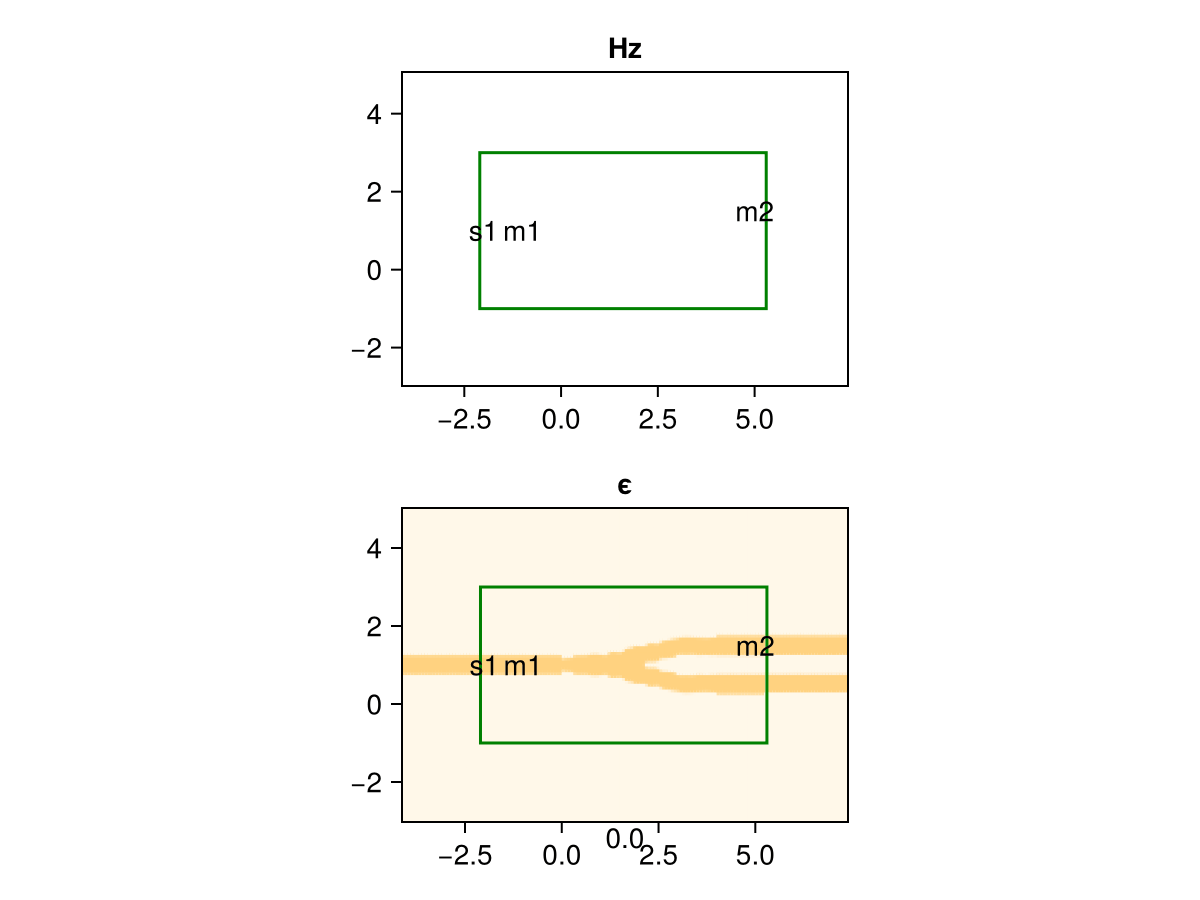

In [ ]:
# optimization targets wrt wavelengths
targets = {
    "tparams": {
        1.55: {"2,1": .5},
    }
}

lumi.make_prob(
    path,  # path to make problem folder
    c,
    targets=targets,
    symmetries=["y"],
    #
    materials=lumi.MATERIALS,
    layer_stack=lumi.SOI220,
    approx_2D_mode="TE",  # makes problem 2.5D instead of 3D
    #
    lmin=0.15,  # approximate minimum feature size
    fill_material="Si",
    void_material="SiO2",
    #
    source_port_margin=source_port_margin,
    xmargin_mode=xmargin_mode,
    #
    nres=6,  # number of grid points per wavelength in material (not vacuum)
    #
    init_holes=False,
    stoploss=0.05,
    iters=100,  # max iters
    #
    saveat=5,  # save frame every `saveat` periods for movie
    force=True,  # delete and overwrite existing path
)

# runs adjoint optimization.
lumi.solve(path)
lumi.make_movie(path)